## GDP of country with linear regression to train the model and the output of prediction is if money make people happier


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Inspect data as tabular

### Load Better life index data
- filter df only INEQUALITY features with value Total


In [70]:

lifesatisfy_df = pd.read_csv("dataset/oecd_bli_2015.csv")
lifesatisfy_df = lifesatisfy_df[lifesatisfy_df["INEQUALITY"]=="TOT"]
# lifesatisfy_df.head()
lifesatisfy_df


,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.90,NaN,NaN
3214,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.48,E,Estimated value
3215,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.97,E,Estimated value
3216,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.62,NaN,NaN


- Create pivot table (Matrix) where index is Country, column is Indicator (life satisfaction) and value is Value

In [71]:
lifesatisfy_df = lifesatisfy_df.pivot_table(index="Country", columns="Indicator", values="Value")
lifesatisfy_df

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


### Convert and load gdp per capita

In [72]:
gdp_df = pd.read_csv("dataset/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
# gdp_df = pd.read_csv("dataset/advancedEcon.xls",encoding='latin1')
gdp_df.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_df.set_index("Country", inplace=True)
gdp_df

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...
Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0


## Merge 2 table: life satisfaction and GDP per capita

In [73]:
full_country_matrix = pd.merge(left=lifesatisfy_df, right=gdp_df,
                                  left_index=True, right_index=True)
full_country_matrix.sort_values(by="GDP per capita", inplace=True)
# full_country_matrix[["GDP per capita","Life satisfaction"]]
full_country_matrix

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


- Processing: Remove The records that doesn't need for the output


In [74]:

# define row to remove
remove_rows = [0,1,6,8,33,34,35]
keep_rows = list(set(range(36)) - set(remove_rows))

# filter the DF and keep only specific rows and cols
full_country_matrix = full_country_matrix[["GDP per capita", "Life satisfaction"]].iloc[keep_rows]
# full_country_matrix[["GDP per capita", "Life satisfaction"]]
full_country_matrix

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


## Visualize the data from DF

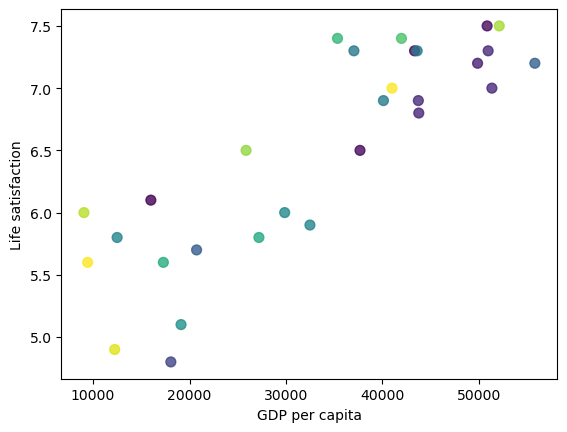

In [75]:
# plot data points from DF
# full_country_matrix.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.scatter(full_country_matrix['GDP per capita'], full_country_matrix['Life satisfaction'],
            c=np.random.rand(full_country_matrix.shape[0]),  # Assign random colors
            s=50,
            cmap='viridis',  # Use a colormap
            alpha=.8)  # Make points semi-transparent

# Add title and grid
# plt.title('GDP per Capita and Life Satisfaction')
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.show()

## Select model: Linear Regression

### Train model by two function: fitness func is how good model is and cost func is how bad
- LR mostly use cost func: measure distance between linear model prediction and training example -> minimize the dist
- Train: (run algo) feed the model to find model parameters that make best fit the train data: 
    -  θ(0) = 4.85 and θ(1) = 4.91 * 10^–5
    - This GDP example: life_satisfy = θ(0)+ θ(1) * GDP_per_capita

- X : model in scikit-learn expects inout X is 2D or matrix where each row represent one sample and each cols represent a feature
- y : targer, output. Should be 1D array

In [76]:
# Prepare the data
# INPUT
X = np.c_[full_country_matrix["GDP per capita"]]
X1 = np.c_[full_country_matrix["Life satisfaction"]]
# print(X)
print(X.shape) # 2D (arr of arr)


# OUTPUT
y = np.c_[full_country_matrix["Life satisfaction"]]
print(y.shape)

# ylabel = full_country_matrix["Life satisfaction"].values
# print(ylabel)


(29, 1)
(29, 1)


In [77]:
import sklearn.linear_model

# linear model
model_lr = sklearn.linear_model.LinearRegression()

# Train the model
model_lr.fit(X,y)

# Make prediction for Cyprus 
# X_new = [[35000]]   # Cyprus GDP per capita
X_new = [[39999]] 
print(model_lr.predict(X_new))  # output [[6.57209341]]


[[6.81762152]]


## Select Model: K-nearest Neighbors
- Prediction of KNN is better than LR
- Select 3NN regression model k =3

In [78]:
import sklearn.neighbors

# nearest neighbor
model_knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model_knn.fit(X,y)

# Make prediction for Cyprus
print(model_knn.predict(X_new))

[[7.1]]
